In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
#Train and test data are merged together since it is a kaggle competition.  This eliminates possibilities that will not be detected

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


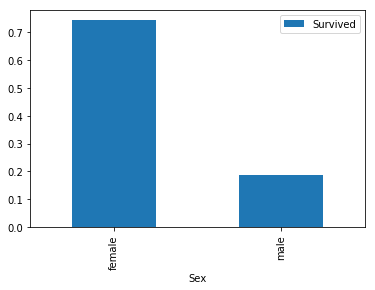

In [19]:
sex_pivot = train.pivot_table(index='Sex', values=['Survived'])
sex_pivot.plot.bar()
plt.show()

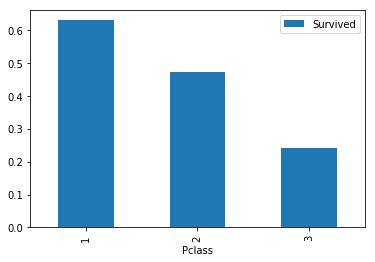

In [20]:
pclass_pivot = train.pivot_table(index='Pclass', values=['Survived'])
pclass_pivot.plot.bar()
plt.show()

In [23]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_categories'] = pd.cut(df['Age'], cut_points, labels=label_names)
    return df

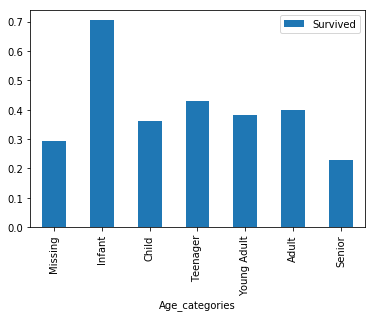

In [29]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

train = process_age(train, cut_points,label_names)
test = process_age(test, cut_points,label_names)

age_categories_pivot = train.pivot_table(index='Age_categories', values='Survived')
age_categories_pivot.plot.bar()
plt.show()

In [30]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [31]:
train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")

train = create_dummies(train, 'Sex')
test = create_dummies(test, 'Sex')

train = create_dummies(train, 'Age_categories')
test = create_dummies(test, 'Age_categories')

In [110]:
train['data_source'] = 'Train'
test['data_source'] = 'Test'

In [111]:
data = pd.concat([train, test])

In [112]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
data_source       0
dtype: int64

In [113]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,data_source
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Train


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
data_source    1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [115]:
data['Cabin'].fillna('NA', inplace=True)

In [116]:
# Fill missing age with average ages of that pclass
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

In [117]:
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

In [118]:
#fillna with mode
from scipy.stats import mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
data_source    1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [120]:
#First character of Cabin may indicate proximity to lifeboats.
data['Cabin_category'] = data['Cabin'].str[0]

In [121]:
data['Cabin_category'].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_category, dtype: int64

In [122]:
print(len(data['Ticket'].unique()))
print(len(data['Ticket']))
# There are more than one passengers on the same ticket indicating that they are a family or group travelers.
# Ticket can be included in the dummy variables


929
1309


In [123]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,data_source,Cabin_category
0,22.0,NA,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Train,N
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Train,C
2,26.0,NA,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Train,N
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Train,C
4,35.0,NA,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Train,N


In [124]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'data_source',
       'Cabin_category'],
      dtype='object')

In [125]:
col_dummies = ['Cabin', 'Embarked', 'Pclass', 'Sex', 'Ticket', 'Cabin_category']
data = pd.get_dummies(data, columns= col_dummies)

In [126]:
data_train = data[data['data_source']=='Train']

In [127]:
data_train = data_train.drop(['Name', 'PassengerId', 'data_source'], axis=1)

In [128]:
X = data_train.drop('Survived', axis=1)
y = data_train['Survived']

In [129]:
X.shape

(891, 1137)

Model Training

In [130]:
# Importing training models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [131]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [132]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

712 179 712 179


In [133]:
pipelines = {'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
             'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
             'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
             'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
            }

In [134]:
l1_hyperparameters = {'logisticregression__C': np.linspace(1e-3, 1e3, 10)}
l2_hyperparameters = {'logisticregression__C': np.linspace(1e-3, 1e3, 10)}
rf_hyperparameters = {'randomforestclassifier__n_estimators': [100, 200],
                     'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
                     }
gb_hyperparameters = {'gradientboostingclassifier__n_estimators': [100,200],
                     'gradientboostingclassifier__max_depth': [1,3,5],
                     'gradientboostingclassifier__learning_rate':[0.05, 0.1, 0.2]
                     }

In [135]:
hyperparameters = {'l1': l1_hyperparameters,
                  'l2': l2_hyperparameters,
                  'rf': rf_hyperparameters,
                  'gb': gb_hyperparameters
                  }

In [136]:
fitted_models = {}
for name, pipeline in pipelines.items():
    model  = GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=1)
    model.fit(X_train, y_train)
    
    fitted_models[name] = model
    print('{} has been fitted'.format(name))
    

l1 has been fitted
l2 has been fitted
rf has been fitted
gb has been fitted


In [137]:
#Evaluate the metrics

from sklearn.metrics import roc_curve, auc
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.766853932584
l2 0.800561797753
rf 0.820224719101
gb 0.832865168539


In [138]:
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = pred[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print(name, auc(fpr, tpr))
    

l1 0.856798069187
l2 0.835746849021
rf 0.841646554036
gb 0.863032984714


In [140]:
fitted_models['gb'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
   ...       presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False))])

In [141]:
fitted_models['gb'].best_params_

{'gradientboostingclassifier__learning_rate': 0.2,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__n_estimators': 200}

In [142]:
data_test = data[data['data_source'] == 'Test']

In [144]:
data_test = data_test.drop(['Name', 'PassengerId', 'data_source'], axis=1)

In [145]:
X_test_kaggle = data_test.drop('Survived', axis=1)
X_test_kaggle.shape

(418, 1137)

In [146]:
X_test_kaggle.head()

,Age,Fare,Parch,SibSp,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,Cabin_A19,...,Ticket_WE/P 5735,Cabin_category_A,Cabin_category_B,Cabin_category_C,Cabin_category_D,Cabin_category_E,Cabin_category_F,Cabin_category_G,Cabin_category_N,Cabin_category_T
0,34.5,7.8292,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,62.0,9.6875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,22.0,12.2875,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [148]:
pipeline = make_pipeline(StandardScaler(), GradientBoostingClassifier(learning_rate=0.2, random_state=123, max_depth=3, n_estimators=200))

In [149]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
   ...       presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False))])

In [150]:
y_pred_kaggle = pipeline.predict(X_test_kaggle)
y_pred_kaggle = pd.Series(y_pred_kaggle)

In [151]:
result = data[data['data_source']=='Test']['PassengerId']

In [152]:
result = pd.concat([result, y_pred_kaggle], axis=1)
result.columns = ['PassengerId', 'Survived']
result['Survived'] = result['Survived'].astype(int)

In [153]:
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [154]:
result.to_csv('result.csv', index=False)

In [155]:
result['Survived'].sum()

154